# Trusted zone - Household


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import os, sys
module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)


from utils import DBtable_to_df

In [2]:

df = DBtable_to_df('../../household.duckdb','household')

## Data profiling


In [3]:
df.head()

,section,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors,Year
0,1001.0,72.0,86.0,63.0,16.0,10.0,4.0,82.0,63.0,20.0,...,0.0,30.0,13.0,2.0,2.0,13.0,18.0,0.0,0.0,2018
1,1002.0,100.0,91.0,36.0,19.0,7.0,0.0,89.0,28.0,13.0,...,1.0,38.0,9.0,1.0,1.0,10.0,11.0,0.0,1.0,2018
2,1003.0,154.0,179.0,74.0,40.0,13.0,2.0,141.0,77.0,23.0,...,3.0,54.0,18.0,4.0,0.0,23.0,30.0,0.0,1.0,2018
3,1004.0,92.0,95.0,53.0,17.0,10.0,2.0,100.0,64.0,20.0,...,3.0,46.0,15.0,3.0,0.0,14.0,16.0,1.0,0.0,2018
4,1006.0,140.0,179.0,77.0,38.0,14.0,1.0,167.0,78.0,31.0,...,3.0,49.0,13.0,5.0,1.0,17.0,16.0,0.0,0.0,2018


The enitire dataframe could conatain `float64` type values. However, we are already interested in section and year being string type values, since section is a code and year is the version of the dataset.


In [4]:
df.dtypes


section                                                                   float64
single_women_aged_16_to_64                                                float64
single_men_aged_16_to_64                                                  float64
single_women_aged_65_or_over                                              float64
single_men_aged_65_or_over                                                float64
adult_women_with_one_or_more_minors                                       float64
adult_men_with_one_or_more_minors                                         float64
two_adults_from_16_to_64_and_without_minors                               float64
two_adults_one_at_least_65_and_without_minors                             float64
two_adults_and_one_minor                                                  float64
two_adults_and_two_minors                                                 float64
two_adults_and_three_or_more_minors                                       float64
two_adults_over_

In the plots below, we can verify with the kernel density estimation, there are variables that do not follow the Gaussian curve so that it does not adapt a random variable to a function that depends on the mean and the standard deviation.


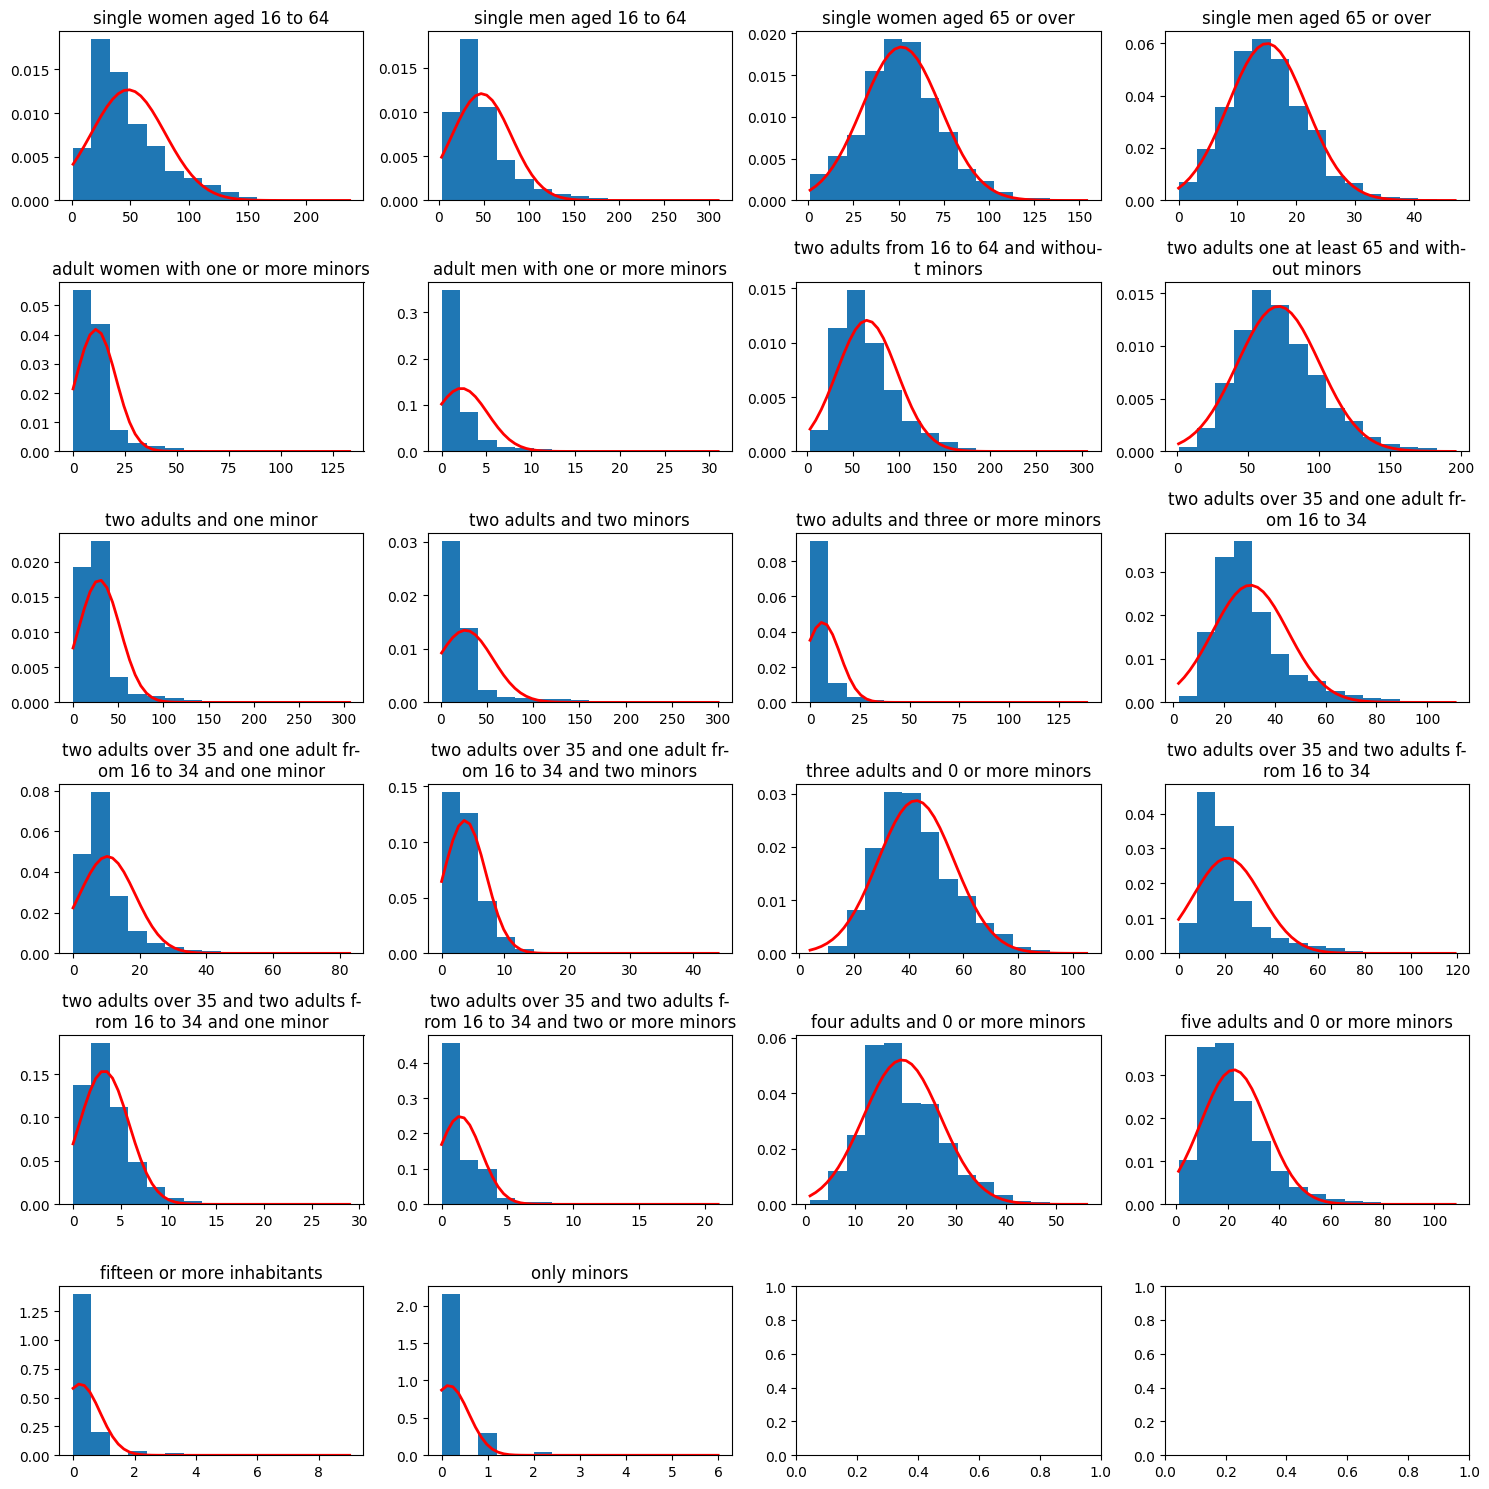

In [5]:
def gaussianity_plot(df):    
    fig, axes = plt.subplots(6, 4, figsize=(15, 15))

    # We skip section feature and year
    for i, c in enumerate(df.columns[1:-1]):
        ax = axes.reshape(-1)[i]

        count, bins, ignore = ax.hist(df[c], 15, density=True)
        sigma = df[c].std()
        mu = df[c].mean()
        dbins = np.linspace(bins[0], bins[-1])
        ax.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (dbins - mu)**2
                                                            / (2 * sigma**2)), linewidth=2, color='red')
        c = c.replace('_', ' ')
        title = f'{c[:35]}-\n{c[35:]}' if len(c) > 35 else c
        t = ax.set_title(title)

    plt.tight_layout()

gaussianity_plot(df)

Already in the above illustration we may have noticed some of these inconsistent values, but we will use the following table in conjunction to reach a conclusion.


In [6]:
df.describe()


,section,single_women_aged_16_to_64,single_men_aged_16_to_64,single_women_aged_65_or_over,single_men_aged_65_or_over,adult_women_with_one_or_more_minors,adult_men_with_one_or_more_minors,two_adults_from_16_to_64_and_without_minors,two_adults_one_at_least_65_and_without_minors,two_adults_and_one_minor,...,two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor,two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors,three_adults_and_0_or_more_minors,two_adults_over_35_and_two_adults_from_16_to_34,two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor,two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors,four_adults_and_0_or_more_minors,five_adults_and_0_or_more_minors,fifteen_or_more_inhabitants,only_minors
count,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,...,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000,7329.000000
mean,10446.077773,48.079274,47.395279,51.515077,15.039023,11.033292,2.224997,65.191431,71.452313,29.175194,...,10.299904,3.702006,42.690408,21.030973,3.266885,1.410288,19.294992,22.343567,0.230181,0.159503
std,5414.210539,31.489794,33.013755,21.728245,6.664517,9.535413,2.934836,33.039019,29.016332,22.894930,...,8.368336,3.337035,13.907458,14.642678,2.594501,1.605347,7.676172,12.737230,0.644794,0.427069
min,1001.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,...,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,6075.000000,25.000000,26.000000,38.000000,10.000000,6.000000,1.000000,42.000000,51.000000,17.000000,...,5.000000,2.000000,32.000000,12.000000,1.000000,0.000000,14.000000,13.000000,0.000000,0.000000
50%,10188.000000,40.000000,39.000000,50.000000,14.000000,9.000000,1.000000,59.000000,68.000000,23.000000,...,8.000000,3.000000,41.000000,17.000000,3.000000,1.000000,18.000000,19.000000,0.000000,0.000000
75%,15047.000000,63.000000,59.000000,65.000000,19.000000,13.000000,3.000000,81.000000,88.000000,32.000000,...,12.000000,5.000000,51.000000,25.000000,5.000000,2.000000,24.000000,28.000000,0.000000,0.000000
max,21033.000000,237.000000,310.000000,154.000000,47.000000,133.000000,31.000000,305.000000,196.000000,306.000000,...,83.000000,44.000000,105.000000,119.000000,29.000000,21.000000,56.000000,108.000000,9.000000,6.000000


* **population:** the information of this variable can be true
* **single_women_aged_16_to_64:** the information of this variable can be true
* **single_men_aged_16_to_64:** the information of this variable can be true
* **single_women_aged_65_or_over:** the information of this variable can be true
* **single_men_aged_65_or_over:** the information of this variable can be true
* **adult_women_with_one_or_more_minors:** the information of this variable can be true
* **adult_men_with_one_or_more_minors:** the information of this variable can be true
* **two_adults_from_16_to_64_and_without_minors:** the information of this variable can be true
* **two_adults_one_at_least_65_and_without_minors:** the information of this variable can be true
* **two_adults_and_one_minor:** the information of this variable can be true, although although it is a little rare that there is a district where there are not two adults with a minor
* **two_adults_and_two_minors:** the information of this variable can be true
* **two_adults_and_three_or_more_minors:** the information of this variable can be true
* **two_adults_over_35_and_one_adult_from_16_to_34:** the information of this variable can be true
* **two_adults_over_35_and_one_adult_from_16_to_34_and_one_minor:** the information of this variable can be true
* **two_adults_over_35_and_one_adult_from_16_to_34_and_two_minors:** the information of this variable can be true
* **three_adults_and_0_or_more_minors:** the information of this variable can be true
* **two_adults_over_35_and_two_adults_from_16_to_34:** the information of this variable can be true
* **two_adults_over_35_and_two_adults_from_16_to_34_and_one_minor:** the information of this variable can be true
* **two_adults_over_35_and_two_adults_from_16_to_34_and_two_or_more_minors:**
* **four_adults_and_0_or_more_minors:** the information of this variable can be true
* **five_adults_and_0_or_more_minors:** the information of this variable can be true
* **fifteen_or_more_inhabitants:** the information of this variable can be true
* **only_minors:** the information of this variable can be true

### Correlation matrix


Observing the correlation heatmap we can know those variable that are linearly related.

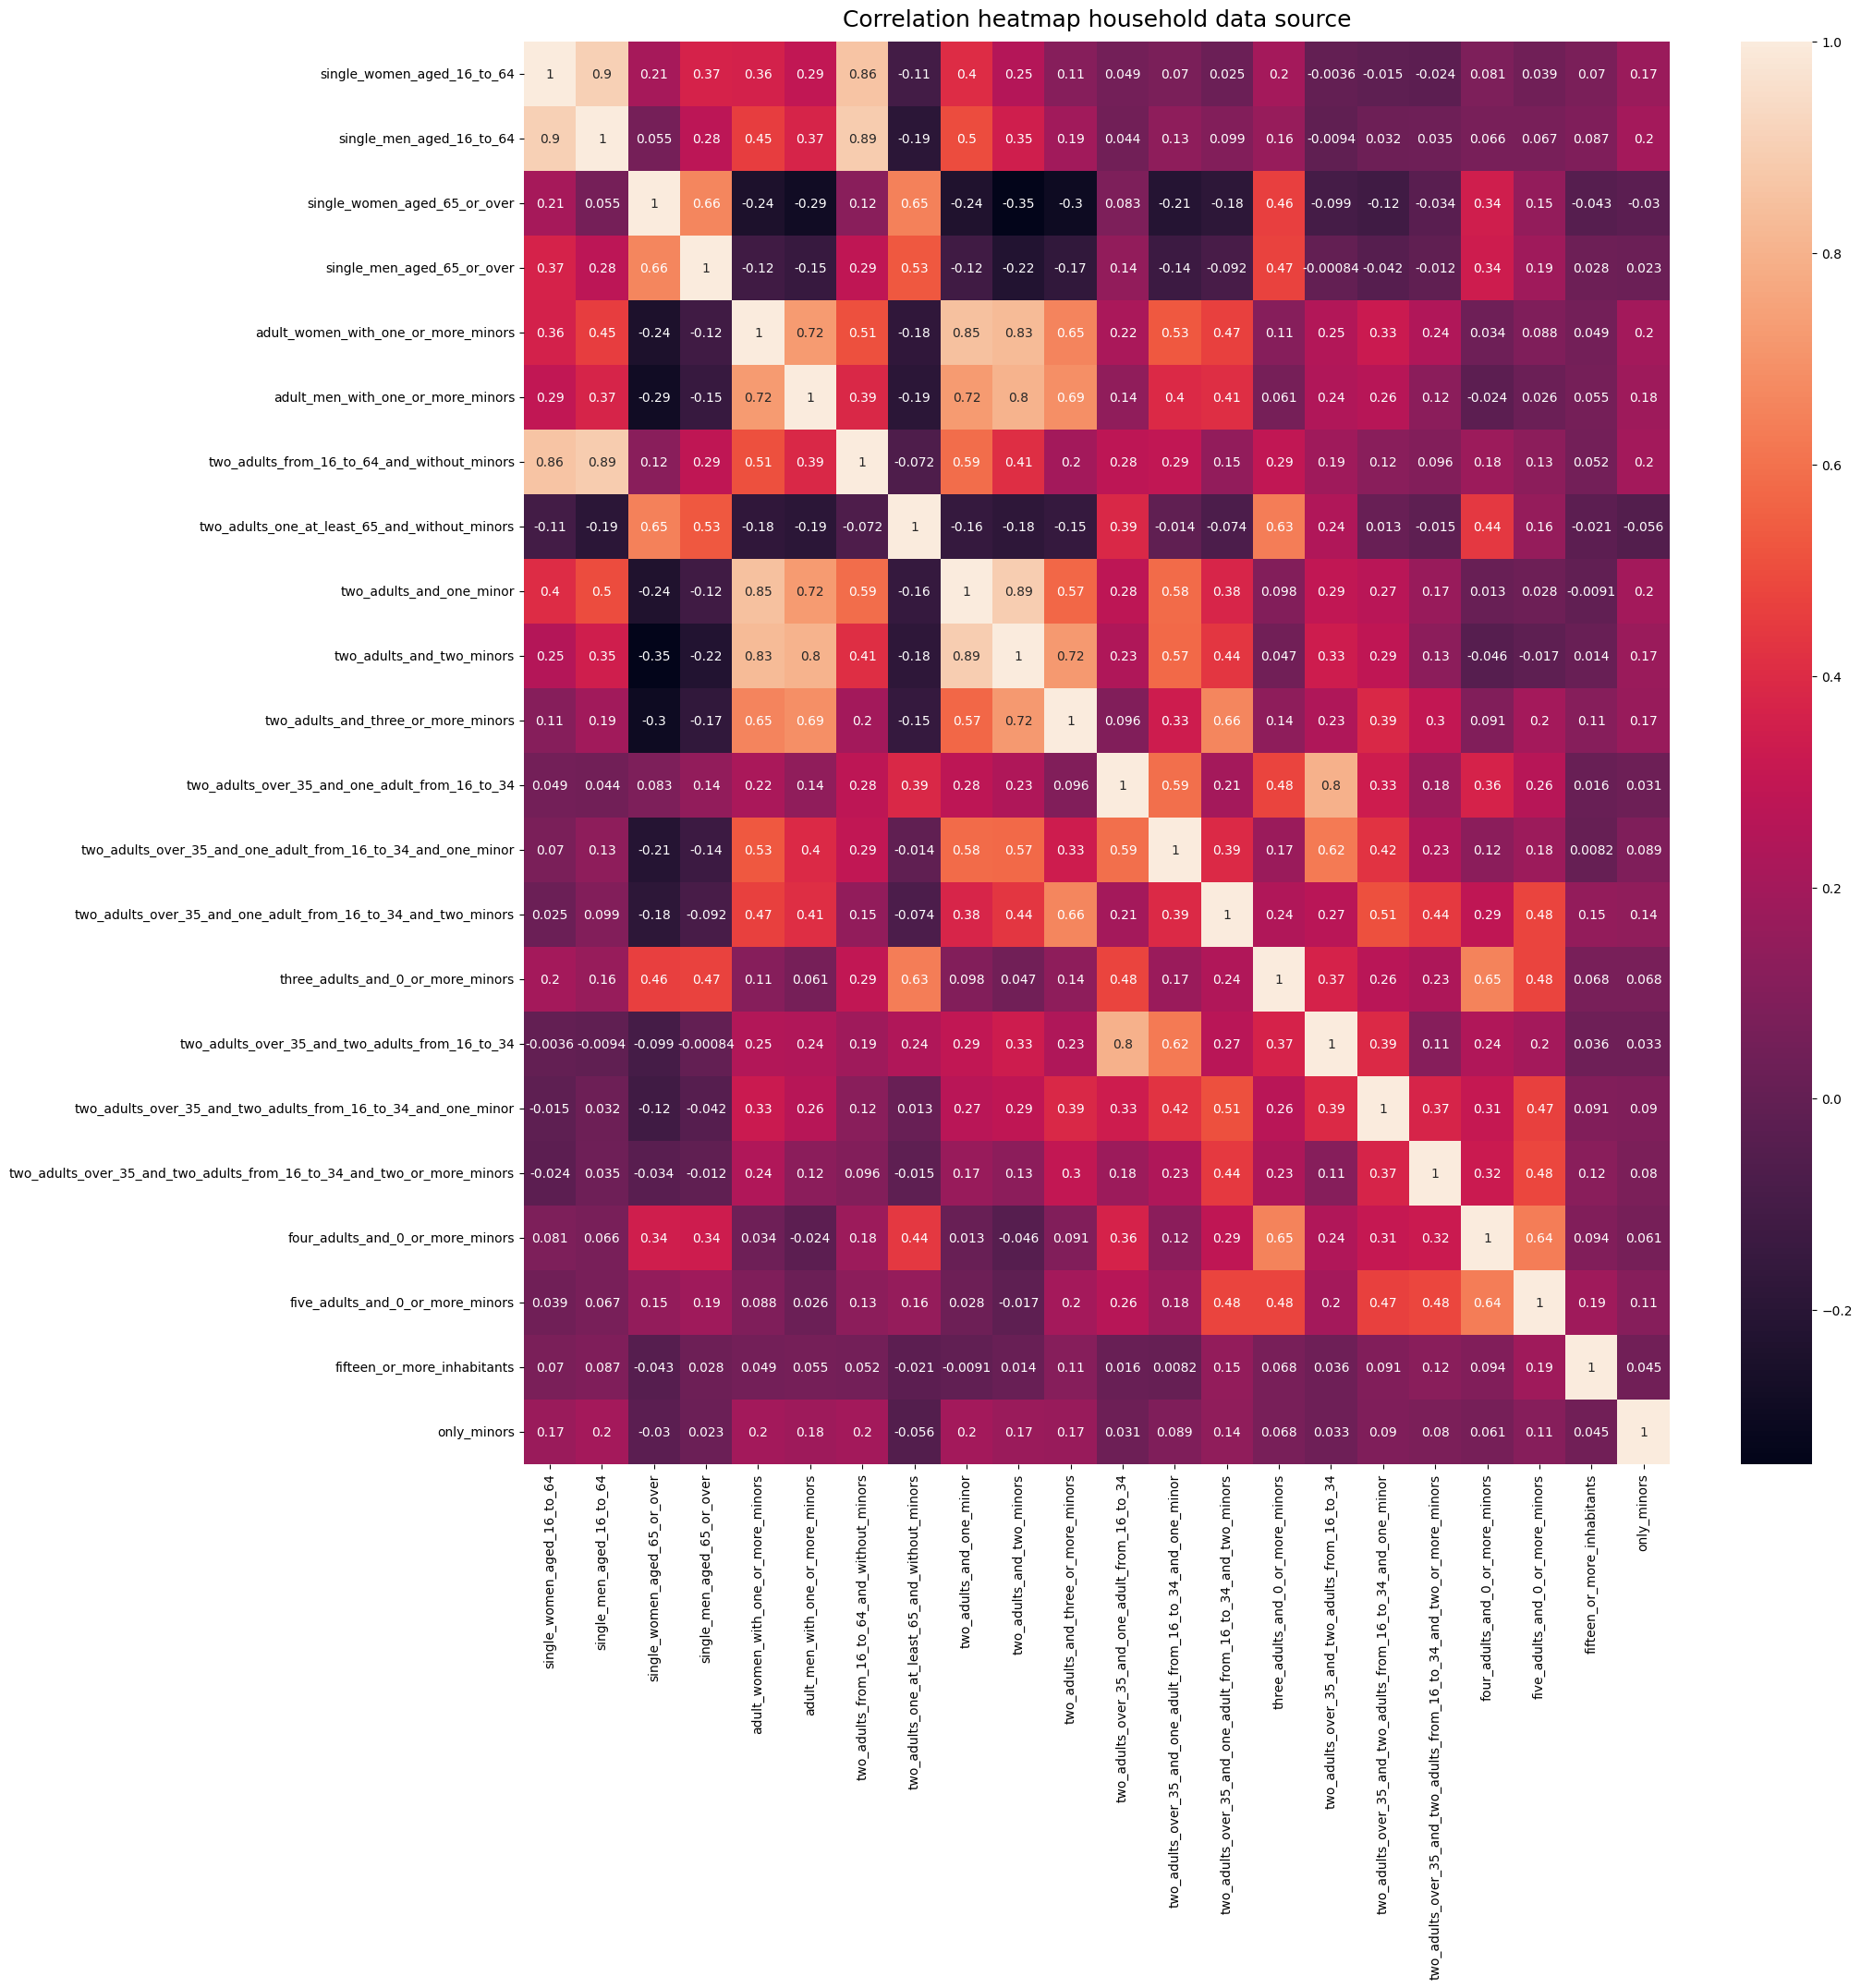

In [7]:
def corr_plot(df):
    plt.figure(figsize=(20, 20))
    ax=sns.heatmap(df.iloc[:,1:-1].corr(), annot=True)
    ax.set_title('Correlation heatmap household data source', fontdict={'fontsize':18}, pad=12)
    
corr_plot(df)

As there are many variables we decided to descent order by the absolute correlation, to see the higher correlation ones.

In [8]:
def get_redundant_pairs(df):
    """
    Get diagonal and lower triangular pairs of correlation matrix
    """
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

corrplot = get_correlations(df.iloc[:,1:-1])
corrplot[:10] # show the top 10 absolute correlation

single_women_aged_16_to_64                      single_men_aged_16_to_64                           0.901486
two_adults_and_one_minor                        two_adults_and_two_minors                          0.891433
single_men_aged_16_to_64                        two_adults_from_16_to_64_and_without_minors        0.886744
single_women_aged_16_to_64                      two_adults_from_16_to_64_and_without_minors        0.862016
adult_women_with_one_or_more_minors             two_adults_and_one_minor                           0.851634
                                                two_adults_and_two_minors                          0.830971
adult_men_with_one_or_more_minors               two_adults_and_two_minors                          0.800571
two_adults_over_35_and_one_adult_from_16_to_34  two_adults_over_35_and_two_adults_from_16_to_34    0.795440
adult_women_with_one_or_more_minors             adult_men_with_one_or_more_minors                  0.722850
adult_men_with_one_or_more_m